In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
data = np.genfromtxt("build/times.csv", skip_header=1, delimiter=',')
data[:, 2] -= data[0, 1]
data[:, 1] -= data[0, 1]

In [3]:
def normalize(x):
    return x / np.amax(np.abs(x))

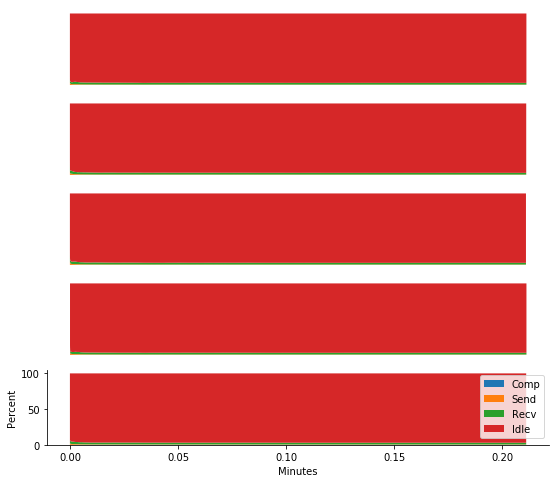

In [4]:
world_size = int(data[-1,0])+1

plt.figure(figsize=(9,8/5*world_size))


for proc in range(0, world_size):
    X = data[data[:, 0] == proc, :]
    if proc == 0:
        ax0 = plt.subplot(world_size, 1, proc+1)
    else:
        ax = plt.subplot(world_size, 1, proc+1, sharex=ax0)
    
    t_tot = np.sum(X[:, 3:], axis=1)/100.0
    plt.stackplot(X[:, 1]/60, X[:,3]/t_tot, X[:,4]/t_tot, X[:,5]/t_tot, X[:,6]/t_tot, labels=["Comp", "Send", "Recv", "Idle"])
    
    
    if proc == world_size-1:
        plt.legend()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        #ax.spines['left'].set_visible(False)
        plt.xlabel("Minutes")
        plt.ylabel("Percent")
    else:
        plt.axis("off")

plt.show()

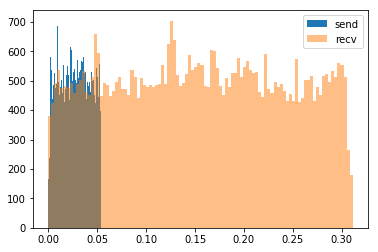

In [16]:
plt.figure()
plt.hist(data[:, 4], 100, label="send", alpha=1.0)
plt.hist(data[:, 5], 100, label="recv", alpha=0.5)
#plt.hist(data[:, 4], 100, label="idle")
plt.legend()
plt.show()

In [6]:
data.shape

(50005, 7)

In [7]:
total_seconds = 123.01243123
hours, rem = divmod(total_seconds, 60*60)
minutes, rem = divmod(rem, 60)
seconds, rem = divmod(rem, 1)
print("{:2}:{:02}:{:02}.{:02}".format(int(hours), int(minutes), int(seconds), int(rem*100)))

 0:02:03.01


In [8]:
starttime = datetime.datetime.fromtimestamp(1538639407)

In [9]:
starttime.strftime('%B %-d, %Y ')

'October 4, 2018 '